In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,48247,None,None,85794.912165
2020-06-13,48248,None,None,79684.683838
2020-06-14,48249,None,None,74018.204500
2020-06-15,48250,None,None,68679.410587
2020-06-16,48251,None,None,63921.766481
...,...,...,...,...
2021-04-13,48552,None,None,34818.200824
2021-04-14,48553,None,None,33124.881675
2021-04-15,48554,None,None,31466.269188


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-17_2021-04-17-20-00.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-16_2021-04-16-19-18.pickle


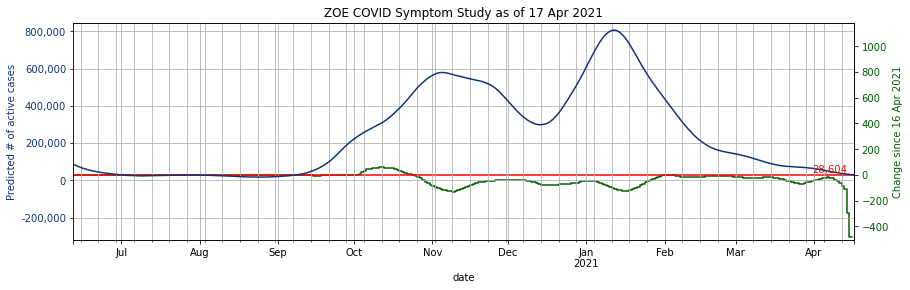

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

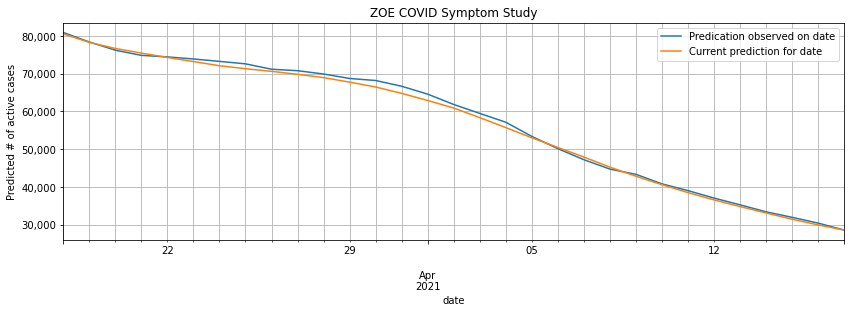

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-04-17_2021-04-17-20-00.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
281,Newcastle upon Tyne,E08000021,0.626672
294,Walsall,E08000030,0.543844
326,Isle of Anglesey,W06000001,0.454815
15,"Kingston upon Hull, City of",E06000010,0.273073
313,Aberdeen City,S12000033,0.247307
203,South Northamptonshire,E07000155,0.199003
390,Dundee City,S12000042,0.193593
325,Glasgow City,S12000046,0.189108
274,Wigan,E08000010,0.185905
372,Moray,S12000020,0.176898
